In [1]:
import numpy as np
import random
import pandas as pd
import os
import time
from tqdm import tqdm
os.getcwd()

'/Users/HaritaDellaporta/Dropbox/SupervisedLearning, CH/Assignment2/src'

In [2]:
data = np.load('input_arrays.npy')

# One vs All Kernel Perceptron

In [3]:
class CPerceptron(object):
    
    def __init__(self, size, K_train, K_test, kerneltype='poly', kerneldegree=5, N=600, C=10):
        self.alpha = np.zeros(shape=(C, size))
        self.batch_size = size
        self.C = C
        self.N = N
        self.K_train = K_train
        self.K_test = K_test
        self.confusion = np.zeros(shape = (C, C))
        self.indices = []
        
    def my_sign(self, x):
        if(x <= 0.0):
            return -1.0
        else:
            return 1.0
        
    def scores(self, K, x_):
        
        y_predict = self.alpha @ K[:,x_]
        
        return y_predict
    
    def train_generation(self, y_train):
        
        mistakes = 0
        for i in range(self.batch_size):

            y_ = y_train[i,:]

            y_predict = self.scores(self.K_train, i)
            for cl in range(self.C):
                
                if(y_ == cl):
                    y_label = 1.0
                else:
                    y_label = -1.0
                
                if(y_label*y_predict[cl] <= 0):
                    
                    self.alpha[cl, i] = self.alpha[cl, i] - self.my_sign(y_predict[cl])
   
            maxi = np.argmax(y_predict)
            if(maxi != y_):
                mistakes += 1
                
        return mistakes/self.batch_size
    
    def test_generation(self, y_test):
        mistakes = 0
        n = len(y_test)
        for i in range(n):
            y_ = y_test[i,:]
            y_predict = self.scores(self.K_test, i)

            max_index = np.argmax(y_predict)
            if(max_index != y_):
                mistakes += 1
        return mistakes/n
                
    
    def test_generation_with_confusion(self, y_test):
        mistakes = 0
        n = len(y_test)
        for i in range(n):
            y_ = y_test[i,:]
            y_predict = self.scores(self.K_test, i)

            max_index = np.argmax(y_predict)
            if(max_index != y_):
                mistakes += 1
                self.confusion[int(y_), int(max_index)] += 1
                
        return mistakes/n, self.confusion
                
    def test_generation_with_indices(self, y_test):
        
        mistakes = 0
        n = len(y_test)
        for i in range(n):
            y_ = y_test[i,:]
            y_predict = self.scores(self.K_test, i)

            max_index = np.argmax(y_predict)
            if(max_index != y_):
                mistakes += 1
                self.indices.append(i)
        
        return mistakes/n, self.indices

### Create Gram Matrix

In [4]:
def form_gram_matrix(x_, y_, d):
    
    #k = np.einsum('ik,jk', x_, y_)**d
    k = (x_ @ y_.T)**d 
    return k

### Training with Epochs

In [5]:
def run_k_epochs(x_train, y_train, x_test, y_test, number_of_epochs, d):
    
    K_train = form_gram_matrix(x_train, x_train, d)
    K_test = form_gram_matrix(x_train, x_test, d)

    cper = CPerceptron(np.size(y_train), K_train, K_test, 'poly', d)
    m_1, m_2 = 0, 0
    C = 0
    
    for ep in range(number_of_epochs):
        #print('Performing epoch {}...'.format(ep+1))
        
        if(ep != number_of_epochs-1):
            m_1 = cper.train_generation(y_train)
           # print('Percentage training error: {0:.2f}%'.format(100*m_1))
            m_2 = cper.test_generation(y_test)
           # print('Percentage test error: {0:.2f}%\n'.format(100*m_2))
        else:
            m_1 = cper.train_generation(y_train)
           # print('Percentage training error: {0:.2f}%'.format(100*m_1))
            m_2, C = cper.test_generation_with_confusion(y_test)
           # print('Percentage test error: {0:.2f}%\n'.format(100*m_2))
            
        
    return m_1, m_2, C

In [6]:
import matplotlib.pyplot as plt

In [9]:
def find_number_of_epochs(data):
    
    n, dim = data.shape
    split_size = int(0.8*n)
    
    all_test_errors = []
    for d in range(1, 8):
        test_errors = np.zeros(20)
        print('Training for Polynomial Degree: {}'.format(d))
        
        for r in range(5):
            print('------- Run {} -------'.format(r+1))
            np.random.shuffle(data)
            x_train = data[:split_size,1:dim]
            y_train = data[:split_size,0][:, np.newaxis]
            x_test = data[split_size:,1:dim]
            y_test = data[split_size:,0][:, np.newaxis]
            
            K_train = form_gram_matrix(x_train, x_train, d)
            K_test = form_gram_matrix(x_train, x_test, d)
            cper = CPerceptron(np.size(y_train), K_train, K_test, 'poly', d)
            
            m_1, m_2 = 0, 0
            for epoch in range(20):
                m_1 = cper.train_generation(y_train)
                print('Percentage training error: {0:.2f}%'.format(100*m_1))
                m_2 = cper.test_generation(y_test)
                print('Percentage test error: {0:.2f}%\n'.format(100*m_2))
                test_errors[epoch] += m_2
                
        all_test_errors.append(test_errors/5)
    
    return all_test_errors
    

In [10]:
a_t_e = find_number_of_epochs(data)

Training for Polynomial Degree: 1
------- Run 1 -------
Percentage training error: 15.11%
Percentage test error: 9.84%

Percentage training error: 9.77%
Percentage test error: 10.27%

Percentage training error: 8.74%
Percentage test error: 11.77%

Percentage training error: 8.48%
Percentage test error: 10.00%

Percentage training error: 7.81%
Percentage test error: 7.53%

Percentage training error: 7.61%
Percentage test error: 9.25%

Percentage training error: 7.64%
Percentage test error: 9.46%

Percentage training error: 7.07%
Percentage test error: 8.33%

Percentage training error: 7.07%
Percentage test error: 8.01%

Percentage training error: 6.55%
Percentage test error: 9.30%

Percentage training error: 6.45%
Percentage test error: 9.46%

Percentage training error: 6.52%
Percentage test error: 8.71%

Percentage training error: 6.43%
Percentage test error: 8.01%

Percentage training error: 6.76%
Percentage test error: 7.53%

Percentage training error: 6.18%
Percentage test error: 7.

Percentage training error: 0.43%
Percentage test error: 3.28%

Percentage training error: 0.28%
Percentage test error: 3.17%

Percentage training error: 0.35%
Percentage test error: 3.44%

Percentage training error: 0.23%
Percentage test error: 3.44%

Percentage training error: 0.15%
Percentage test error: 3.66%

Percentage training error: 0.13%
Percentage test error: 3.17%

Percentage training error: 0.11%
Percentage test error: 3.12%

Percentage training error: 0.17%
Percentage test error: 2.96%

Percentage training error: 0.07%
Percentage test error: 3.28%

Percentage training error: 0.08%
Percentage test error: 3.23%

Percentage training error: 0.08%
Percentage test error: 3.17%

Percentage training error: 0.07%
Percentage test error: 3.01%

Percentage training error: 0.07%
Percentage test error: 3.12%

------- Run 3 -------
Percentage training error: 9.30%
Percentage test error: 7.37%

Percentage training error: 3.50%
Percentage test error: 5.27%

Percentage training error: 1.92%


Percentage training error: 0.04%
Percentage test error: 2.26%

Percentage training error: 0.01%
Percentage test error: 2.15%

Percentage training error: 0.01%
Percentage test error: 2.15%

Percentage training error: 0.01%
Percentage test error: 2.20%

Percentage training error: 0.03%
Percentage test error: 2.15%

------- Run 4 -------
Percentage training error: 7.76%
Percentage test error: 5.11%

Percentage training error: 1.73%
Percentage test error: 3.82%

Percentage training error: 0.67%
Percentage test error: 3.71%

Percentage training error: 0.38%
Percentage test error: 2.90%

Percentage training error: 0.23%
Percentage test error: 2.58%

Percentage training error: 0.15%
Percentage test error: 2.90%

Percentage training error: 0.16%
Percentage test error: 2.63%

Percentage training error: 0.07%
Percentage test error: 2.74%

Percentage training error: 0.08%
Percentage test error: 2.53%

Percentage training error: 0.08%
Percentage test error: 2.69%

Percentage training error: 0.05%


Percentage training error: 0.19%
Percentage test error: 3.55%

Percentage training error: 0.16%
Percentage test error: 3.28%

Percentage training error: 0.09%
Percentage test error: 3.28%

Percentage training error: 0.04%
Percentage test error: 3.28%

Percentage training error: 0.05%
Percentage test error: 3.01%

Percentage training error: 0.03%
Percentage test error: 3.17%

Percentage training error: 0.04%
Percentage test error: 3.12%

Percentage training error: 0.08%
Percentage test error: 3.17%

Percentage training error: 0.05%
Percentage test error: 3.23%

Percentage training error: 0.05%
Percentage test error: 3.28%

Percentage training error: 0.05%
Percentage test error: 3.23%

Percentage training error: 0.03%
Percentage test error: 3.17%

Percentage training error: 0.05%
Percentage test error: 3.17%

Percentage training error: 0.05%
Percentage test error: 3.12%

Percentage training error: 0.03%
Percentage test error: 3.12%

Percentage training error: 0.04%
Percentage test error:

Percentage training error: 0.00%
Percentage test error: 3.55%

Percentage training error: 0.00%
Percentage test error: 3.55%

Percentage training error: 0.00%
Percentage test error: 3.55%

Percentage training error: 0.00%
Percentage test error: 3.55%

Percentage training error: 0.00%
Percentage test error: 3.55%

Percentage training error: 0.00%
Percentage test error: 3.55%

Percentage training error: 0.00%
Percentage test error: 3.55%

Percentage training error: 0.00%
Percentage test error: 3.55%

Percentage training error: 0.00%
Percentage test error: 3.55%

Percentage training error: 0.00%
Percentage test error: 3.55%

------- Run 2 -------
Percentage training error: 7.14%
Percentage test error: 3.33%

Percentage training error: 0.78%
Percentage test error: 2.74%

Percentage training error: 0.16%
Percentage test error: 3.06%

Percentage training error: 0.04%
Percentage test error: 2.58%

Percentage training error: 0.05%
Percentage test error: 2.74%

Percentage training error: 0.04%


Percentage training error: 0.03%
Percentage test error: 3.12%

Percentage training error: 0.03%
Percentage test error: 3.12%

------- Run 3 -------
Percentage training error: 7.26%
Percentage test error: 3.66%

Percentage training error: 0.93%
Percentage test error: 2.69%

Percentage training error: 0.20%
Percentage test error: 2.63%

Percentage training error: 0.11%
Percentage test error: 2.53%

Percentage training error: 0.03%
Percentage test error: 2.69%

Percentage training error: 0.05%
Percentage test error: 2.63%

Percentage training error: 0.04%
Percentage test error: 2.63%

Percentage training error: 0.04%
Percentage test error: 2.74%

Percentage training error: 0.03%
Percentage test error: 2.69%

Percentage training error: 0.03%
Percentage test error: 2.47%

Percentage training error: 0.01%
Percentage test error: 2.47%

Percentage training error: 0.04%
Percentage test error: 2.47%

Percentage training error: 0.03%
Percentage test error: 2.58%

Percentage training error: 0.03%


Text(0,0.5,'Test error')

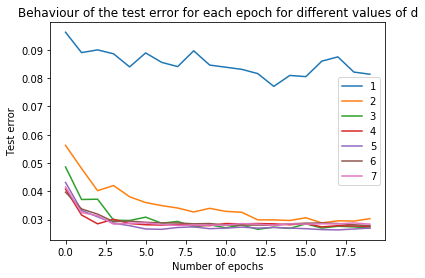

In [12]:
for d in range(7):
    plt.plot(a_t_e[d], label=format(d+1))
    plt.legend()
    
plt.title('Behaviour of the test error for each epoch for different values of d')
plt.xlabel('Number of epochs')
plt.ylabel('Test error')

### 1. Basic Results
Perform 20 runs for d = 1, . . . , 7 each run should randomly split zipcombo into 80%
train and 20% test. Report the mean test and train errors as well as well as standard deviations.
Thus your data table, here, will be 2 × 7 with each “cell” containing a mean±std.

In [35]:
def find_training_test_errors(data):
    
    data_frame = {'Training error':[],
        'Test error':[],
       }
    df = pd.DataFrame(data_frame)

    n, dim = data.shape
    split_size = int(0.8*n)
    
    
    for d in range(1, 8):
        training_errors = np.zeros(20)
        test_errors = np.zeros(20)
        print('Training for Polynomial Degree: {}'.format(d))
        
        for r in range(20):
            print('------- Run {} -------'.format(r+1))
            np.random.shuffle(data)
            x_train = data[:split_size,1:dim]
            y_train = data[:split_size,0][:, np.newaxis]
            x_test = data[split_size:,1:dim]
            y_test = data[split_size:,0][:, np.newaxis]
            training_errors[r], test_errors[r] = run_k_epochs(x_train, y_train, x_test, y_test, 5, d)[0:2]
            
        str1 = '{0:.2f}% \u00B1 {1:.2f}%'.format(100*np.mean(training_errors), 100*np.sqrt(np.var(training_errors)))
        str2 = '{0:.2f}% \u00B1 {1:.2f}%'.format(100*np.mean(test_errors), 100*np.sqrt(np.var(test_errors)))
        df = df.append({'Training error': str1, 'Test error': str2}, ignore_index=True)
          
    df.index = np.arange(1,len(df)+1)
    return df

In [9]:
training_and_test_df = find_training_test_errors(data)

Training for Polynomial Degree: 1
------- Run 1 -------
Performing epoch 1...
Percentage training error: 14.39%
Percentage test error: 10.32%

Performing epoch 2...
Percentage training error: 9.83%
Percentage test error: 10.48%

Performing epoch 3...
Percentage training error: 9.12%
Percentage test error: 10.81%

Performing epoch 4...
Percentage training error: 8.73%
Percentage test error: 9.46%

Performing epoch 5...
Percentage training error: 7.92%
Percentage test error: 8.76%

------- Run 2 -------
Performing epoch 1...
Percentage training error: 14.59%
Percentage test error: 13.06%

Performing epoch 2...
Percentage training error: 9.91%
Percentage test error: 10.27%

Performing epoch 3...
Percentage training error: 9.05%
Percentage test error: 8.76%

Performing epoch 4...
Percentage training error: 8.05%
Percentage test error: 9.35%

Performing epoch 5...
Percentage training error: 7.61%
Percentage test error: 9.35%

------- Run 3 -------
Performing epoch 1...
Percentage training e

In [10]:
training_and_test_df

,Training error,Test error
1,7.96% ± 0.27%,9.37% ± 1.54%
2,0.90% ± 0.08%,3.68% ± 0.45%
3,0.27% ± 0.06%,3.13% ± 0.36%
4,0.13% ± 0.04%,2.92% ± 0.83%
5,0.08% ± 0.03%,2.77% ± 0.35%
6,0.07% ± 0.02%,2.92% ± 0.37%
7,0.06% ± 0.02%,2.89% ± 0.32%


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics.pairwise import euclidean_distances

### 2. Cross Validation
Perform 20 runs : when using the 80% training data split from within to perform
5-fold cross-validation to select the “best” parameter d∗ then retrain on full 80% training set using
d∗ and then record the test errors on the remaining 20%. Thus you will find 20 d∗ and 20 test errors.
Your final result will consist of a mean test error±std and a mean d∗ with std.

### 3. Confusion Matrix
Perform 20 runs : when using the 80% training data split that further to perform
5-fold cross-validation to select the “best” parameter d
∗
retrain on the 80% training using d
∗ and
produce a confusion matrix. Here the goal is to find “confusions” thus if the true label was “7” and
“2” was predicted then a “mistake” should recorded for “(7,2)”; the final output will be a 10 × 10
matrix where each cell contains a confusion error and its standard deviation. Note the diagonal will
be 0.

In [37]:
def find_training_test_errors_CV(data, number_of_runs):
    
    data_frame_1 = {'d*':[], 'test error':[],
       }
    df1 = pd.DataFrame(data_frame_1)
    
    data_frame_2 = {'Mean d* and std':[], 'Mean test error and std':[],}
    df2 = pd.DataFrame(data_frame_2)
    
    n, dim = data.shape
    split_size = int(0.8*n)
    
    best_d_array = np.zeros(shape=(number_of_runs,2))
    confusion_matrices = np.ndarray(shape=(number_of_runs,10,10))
    
    for r in range(number_of_runs):
        
        np.random.shuffle(data)
        x_train = data[:split_size,1:dim]
        y_train = data[:split_size,0][:, np.newaxis]
        x_test = data[split_size:,1:dim]
        y_test = data[split_size:,0][:, np.newaxis]
        
        print('------- Run {} -------'.format(r+1)) 
        test_errors_for_each_d = np.zeros(7)
        
        kf = KFold(n_splits=5, random_state=None, shuffle=False)
        
        index = 0
        for train_index, test_index in kf.split(x_train):
            X_train, X_test = x_train[train_index], x_train[test_index]
            Y_train, Y_test = y_train[train_index], y_train[test_index]
            
            print('Split : {}'.format(index))
            for d in range(1, 8):
               # print('Training for Polynomial Degree: {}'.format(d))
                test_errors = run_k_epochs(X_train, Y_train, X_test, Y_test, 6, d)[1]
                test_errors_for_each_d[d-1] += test_errors
            
            index += 1
            
        best_d = np.argmin(test_errors_for_each_d)+1
        test_error_best_d, confusion_best_d = run_k_epochs(x_train, y_train, x_test, y_test, 6, best_d)[1:3]
         
        best_d_array[r, 0], best_d_array[r, 1] = best_d, test_error_best_d
        confusion_matrices[r] = confusion_best_d
        
        str1 = '{0:.2f}%'.format(100*test_error_best_d)
        df1 = df1.append({'d*': best_d,'test error': str1}, ignore_index=True)  
         
    
    str2 = '{0:.2f} \u00B1 {1:.2f}'.format(np.mean(best_d_array[:,0]), np.sqrt(np.var(best_d_array[:,0])))
    str3 = '{0:.2f}% \u00B1 {1:.2f}%'.format(100*np.mean(best_d_array[:,1]), 100*np.sqrt(np.var(best_d_array[:,1])))
    df2 = df2.append({'Mean d* and std': str2, 'Mean test error and std': str3}, ignore_index=True)
    
    mean_confusion_matrix = confusion_matrices.mean(0)
    std_confusion_matrix = confusion_matrices.std(0)
    
    df1.index = np.arange(1,len(df1)+1)
    df2.index = np.arange(1,len(df2)+1)
    
    df = pd.DataFrame(mean_confusion_matrix)
    for i in range(10):
        for j in range(10):
            str = '{0:.2f} \u00B1 {1:.2f}'.format(mean_confusion_matrix[i,j], std_confusion_matrix[i,j])
            df.iloc[i,j] = str
    
    return df1, df2, df, int(np.mean(best_d_array[:,0]))

In [88]:
df1, df2, df3, best_d = find_training_test_errors_CV(data, 20)

------- Run 1 -------
Split : 0
Split : 1
Split : 2
Split : 3
Split : 4
------- Run 2 -------
Split : 0
Split : 1
Split : 2
Split : 3
Split : 4
------- Run 3 -------
Split : 0
Split : 1
Split : 2
Split : 3
Split : 4
------- Run 4 -------
Split : 0
Split : 1
Split : 2
Split : 3
Split : 4
------- Run 5 -------
Split : 0
Split : 1
Split : 2
Split : 3
Split : 4
------- Run 6 -------
Split : 0
Split : 1
Split : 2
Split : 3
Split : 4
------- Run 7 -------
Split : 0
Split : 1
Split : 2
Split : 3
Split : 4
------- Run 8 -------
Split : 0
Split : 1
Split : 2
Split : 3
Split : 4
------- Run 9 -------
Split : 0
Split : 1
Split : 2
Split : 3
Split : 4
------- Run 10 -------
Split : 0
Split : 1
Split : 2
Split : 3
Split : 4
------- Run 11 -------
Split : 0
Split : 1
Split : 2
Split : 3
Split : 4
------- Run 12 -------
Split : 0
Split : 1
Split : 2
Split : 3
Split : 4
------- Run 13 -------
Split : 0
Split : 1
Split : 2
Split : 3
Split : 4
------- Run 14 -------
Split : 0
Split : 1
Split : 2
Split :

In [89]:
display(df1, df2, df3)

,d*,test error
1,6.0,2.42%
2,6.0,2.85%
3,7.0,2.90%
4,4.0,2.80%
5,5.0,3.12%
6,5.0,3.06%
7,7.0,2.42%
8,7.0,2.74%
9,7.0,2.47%
10,5.0,3.12%


,Mean d* and std,Mean test error and std
1,5.40 ± 1.20,2.77% ± 0.43%


,0,1,2,3,4,5,6,7,8,9
0,0.00 ± 0.00,0.20 ± 0.40,0.55 ± 0.74,0.40 ± 0.66,0.45 ± 0.59,0.70 ± 0.84,1.05 ± 0.97,0.20 ± 0.51,0.15 ± 0.48,0.05 ± 0.22
1,0.15 ± 0.48,0.00 ± 0.00,0.20 ± 0.40,0.00 ± 0.00,1.30 ± 4.14,0.00 ± 0.00,0.40 ± 0.58,0.10 ± 0.30,0.15 ± 0.36,0.45 ± 1.32
2,0.85 ± 0.65,0.40 ± 0.66,0.00 ± 0.00,1.25 ± 1.04,1.20 ± 1.03,0.20 ± 0.40,0.25 ± 0.43,1.10 ± 1.22,0.75 ± 0.99,0.05 ± 0.22
3,0.25 ± 0.43,0.20 ± 0.51,1.10 ± 0.99,0.00 ± 0.00,0.10 ± 0.30,3.05 ± 1.63,0.05 ± 0.22,0.80 ± 1.03,1.35 ± 1.49,0.40 ± 0.66
4,0.20 ± 0.40,0.75 ± 0.89,0.70 ± 0.71,0.05 ± 0.22,0.00 ± 0.00,0.20 ± 0.40,0.85 ± 0.73,0.40 ± 0.49,0.10 ± 0.30,1.45 ± 1.16
5,1.15 ± 0.91,0.10 ± 0.30,0.70 ± 0.71,1.50 ± 1.69,0.75 ± 0.94,0.00 ± 0.00,1.25 ± 1.09,0.10 ± 0.30,0.55 ± 0.97,0.65 ± 0.85
6,0.80 ± 0.81,0.35 ± 0.65,0.55 ± 0.74,0.00 ± 0.00,1.00 ± 1.10,0.45 ± 0.59,0.00 ± 0.00,0.05 ± 0.22,0.20 ± 0.51,0.00 ± 0.00
7,0.05 ± 0.22,0.25 ± 0.70,0.65 ± 0.79,0.05 ± 0.22,1.35 ± 1.19,0.25 ± 0.43,0.00 ± 0.00,0.00 ± 0.00,0.35 ± 0.57,1.10 ± 0.99
8,1.00 ± 0.89,0.60 ± 0.80,0.80 ± 0.81,1.80 ± 1.25,0.85 ± 0.73,1.60 ± 1.36,0.40 ± 0.97,0.75 ± 0.70,0.00 ± 0.00,0.45 ± 0.80
9,0.35 ± 0.48,0.15 ± 0.36,0.35 ± 0.48,0.25 ± 0.54,1.90 ± 1.81,0.25 ± 0.43,0.10 ± 0.30,1.00 ± 0.95,0.20 ± 0.40,0.00 ± 0.00


In [90]:
display(df1.transpose())

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
d*,6,6,7,4,5,5,7,7,7,5,3,5,3,6,6,5,6,6,4,5
test error,2.42%,2.85%,2.90%,2.80%,3.12%,3.06%,2.42%,2.74%,2.47%,3.12%,3.55%,2.42%,2.42%,4.09%,2.37%,2.53%,2.69%,2.37%,2.58%,2.53%


### 4. Hardest to Predict
Within the dataset relative to your experiments there will be five hardest to predict correctly “data
items.” Print out the visualisation of these five digits along with their labels. Is it surprising that
these are hard to predict?


In [38]:
def run_k_epochs_for_indices(x_train, y_train, x_test, y_test, number_of_epochs, d):
    
    K_train = form_gram_matrix(x_train, x_train, d)
    K_test = form_gram_matrix(x_train, x_test, d)

    cper = CPerceptron(np.size(y_train), K_train, K_test, 'poly', d)
    m_1, m_2 = 0, 0
    for ep in range(number_of_epochs):
        print('Performing epoch {}...'.format(ep+1))
        
        if(ep != number_of_epochs-1):
            m_1 = cper.train_generation(y_train)
            print('Percentage training error: {0:.5f}%'.format(100*m_1))
        else:
            m_1 = cper.train_generation(y_train)
            print('Percentage training error: {0:.5f}%'.format(100*m_1))
            m_2, indices = cper.test_generation_with_indices(y_test)
            print('Percentage test error: {0:.5f}%\n'.format(100*m_2))
            
        
    return indices

In [39]:
def find_hardest_to_predict(data, number_of_runs, best_d):
    
    mistake_count = np.zeros(data.shape[0])
    
    x_values = data[:,1:]
    y_values = data[:,0][:, np.newaxis]
        
    
    for r in range(number_of_runs):
        print('------- Run {} -------'.format(r+1)) 
        kf = KFold(n_splits=10, random_state=None, shuffle=False)
    
        for train_index, test_index in kf.split(x_values):
            
            X_train, X_test = x_values[train_index], x_values[test_index]
            Y_train, Y_test = y_values[train_index], y_values[test_index]
            
            for d in range(best_d, best_d+1):
                
                indices = run_k_epochs_for_indices(X_train, Y_train, X_test, Y_test, 5, d)
                for index in indices:
                    mistake_count[test_index[index]] += 1
                    
    return mistake_count.argsort()[-5:][::-1]

In [ ]:
bad_digits = find_hardest_to_predict(data, 20, 5)
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))
plt.axis('off')
for i in range(5):
    index = bad_digits[i]
    img = data[i,1:]
    label = data[i,0]
    ax[i].imshow(img.reshape(16,16), cmap='gray')
    ax[i].title.set_text('Label: {}'.format(int(label)))
    ax[i].set_axis_off()
plt.show()

### 5. Gaussian Kernel
Repeat 1 and 2 (d
∗
is now c and {1, . . . , 7} is now S) above with a Gaussian kernel
K(p, q) = e
−ckp−qk
2
,
c the width of the kernel is now a parameter which must be optimised during cross-validation however,
you will also need to perform some initial experiments to a decide a reasonable set S of values to crossvalidate c over.

In [40]:
from scipy.spatial.distance import pdist, cdist, squareform
import scipy

In [41]:
def form_gram_matrix_gaussian(x_, y_, c):
    
    #dist = cdist(x_,y_, 'sqeuclidean') # gives pairwise square distances
    dist = euclidean_distances(x_,y_,squared=True)
    k = scipy.exp(-c*dist) 
    return k

In [42]:
def run_k_epochs_gaussian(x_train, y_train, x_test, y_test, number_of_epochs, c):
    
    K_train = form_gram_matrix_gaussian(x_train, x_train, c)
    K_test = form_gram_matrix_gaussian(x_train, x_test, c)

    cper = CPerceptron(np.size(y_train), K_train, K_test, 'rbf', c)
    m_1, m_2 = 0, 0
    
    for ep in range(number_of_epochs):
        print('Performing epoch {}...'.format(ep+1))
        
        m_1 = cper.train_generation(y_train)
        print('Percentage training error: {0:.2f}%'.format(100*m_1))
        m_2 = cper.test_generation(y_test)
        print('Percentage test error: {0:.2f}%\n'.format(100*m_2))
    

    return m_1, m_2

In [9]:
def find_number_of_epochs_gaussian(data):
    
    n, dim = data.shape
    split_size = int(0.8*n)
    
    all_test_errors = []
    for c in np.linspace(0.001,0.08,7):
        test_errors = np.zeros(30)
        print('Training for Gaussian kernel parameter: {}'.format(c))
        
        for r in range(5):
            print('------- Run {} -------'.format(r+1))
            np.random.shuffle(data)
            x_train = data[:split_size,1:dim]
            y_train = data[:split_size,0][:, np.newaxis]
            x_test = data[split_size:,1:dim]
            y_test = data[split_size:,0][:, np.newaxis]
            
            K_train = form_gram_matrix_gaussian(x_train, x_train, c)
            K_test = form_gram_matrix_gaussian(x_train, x_test, c)
            cper = CPerceptron(np.size(y_train), K_train, K_test, 'rbf', c)
            
            m_1, m_2 = 0, 0
            for epoch in range(30):
                m_1 = cper.train_generation(y_train)
                print('Percentage training error: {0:.2f}%'.format(100*m_1))
                m_2 = cper.test_generation(y_test)
                print('Percentage test error: {0:.2f}%\n'.format(100*m_2))
                test_errors[epoch] += m_2
                
        all_test_errors.append(test_errors/5)
    
    return all_test_errors
    

In [22]:
a_t_e_g = find_number_of_epochs_gaussian(data)

Training for Gaussian kernel parameter: 0.001
------- Run 1 -------
Percentage training error: 17.55%
Percentage test error: 12.63%

Percentage training error: 9.18%
Percentage test error: 7.37%

Percentage training error: 8.28%
Percentage test error: 9.52%

Percentage training error: 7.04%
Percentage test error: 8.17%

Percentage training error: 6.28%
Percentage test error: 5.54%

Percentage training error: 5.22%
Percentage test error: 8.12%

Percentage training error: 5.12%
Percentage test error: 8.55%

Percentage training error: 4.57%
Percentage test error: 6.99%

Percentage training error: 4.26%
Percentage test error: 5.43%

Percentage training error: 3.71%
Percentage test error: 5.11%

Percentage training error: 3.71%
Percentage test error: 5.27%

Percentage training error: 3.66%
Percentage test error: 5.65%

Percentage training error: 3.62%
Percentage test error: 6.24%

Percentage training error: 3.23%
Percentage test error: 4.57%

Percentage training error: 2.86%
Percentage test

Text(0,0.5,'Test error')

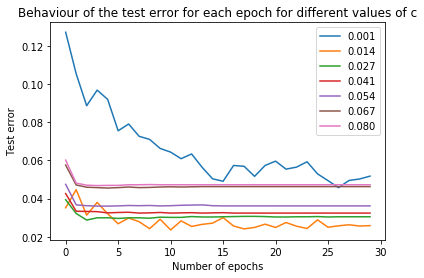

In [37]:
count = 0
for c in np.linspace(0.001,0.08,7):
    plt.plot(a_t_e_g[count], label="{0:.3f}".format(c))
    plt.legend()
    count += 1
    
plt.title('Behaviour of the test error for each epoch for different values of c')
plt.xlabel('Number of epochs')
plt.ylabel('Test error')

In [ ]:
count = 0
for c in np.linspace(0.001,0.08,7):
    plt.plot(a_t_e_g[count], label="{0:.3f}".format(c))
    plt.legend()
    count += 1
    
plt.title('Behaviour of the test error for each epoch for different values of c')
plt.xlabel('Number of epochs')
plt.ylabel('Test error')

In [43]:
def find_training_test_errors_gaussian(data, number_of_runs):
    
    data_frame = {'Kernel width':[], 'Training error':[],
        'Test error':[],
       }
    df = pd.DataFrame(data_frame)

    n, dim = data.shape
    split_size = int(0.8*n)
    
    for c in np.linspace(0.001,0.08,7):           
        training_errors = np.zeros(number_of_runs)
        test_errors = np.zeros(number_of_runs)
        print('Training for Gaussian kernel parameter: {}'.format(c))
        
        for r in range(number_of_runs):
            print('------- Run {} -------'.format(r+1))
            np.random.shuffle(data)
            x_train = data[:split_size,1:dim]
            y_train = data[:split_size,0][:, np.newaxis]
            x_test = data[split_size:,1:dim]
            y_test = data[split_size:,0][:, np.newaxis]
            training_errors[r], test_errors[r] = run_k_epochs_gaussian(x_train, y_train, x_test, y_test, 5, c)
            
        str1 = '{0:.2f}% \u00B1 {1:.2f}%'.format(100*np.mean(training_errors), 100*np.sqrt(np.var(training_errors)))
        str2 = '{0:.2f}% \u00B1 {1:.2f}%'.format(100*np.mean(test_errors), 100*np.sqrt(np.var(test_errors)))
        df = df.append({'Kernel width': c, 'Training error': str1, 'Test error': str2}, ignore_index=True)
          
    df.index = np.arange(1,len(df)+1)
    return df

In [11]:
def find_training_test_errors_CV(data, number_of_runs):
    
    data_frame_1 = {'c*':[], 'test error':[],
       }
    df1 = pd.DataFrame(data_frame_1)
    
    data_frame_2 = {'Mean c* and std':[], 'Mean test error and std':[],}
    df2 = pd.DataFrame(data_frame_2)
    
    n, dim = data.shape
    split_size = int(0.8*n)
    
    best_c_array = np.zeros(shape=(number_of_runs,2))
    
    for r in range(number_of_runs):
        
        np.random.shuffle(data)
        x_train = data[:split_size,1:dim]
        y_train = data[:split_size,0][:, np.newaxis]
        x_test = data[split_size:,1:dim]
        y_test = data[split_size:,0][:, np.newaxis]
        
        print('------- Run {} -------'.format(r+1)) 
        test_errors_for_each_c = np.zeros(7)
        
        kf = KFold(n_splits=5, random_state=None, shuffle=False)
    
        for train_index, test_index in kf.split(x_train):
            X_train, X_test = x_train[train_index], x_train[test_index]
            Y_train, Y_test = y_train[train_index], y_train[test_index]
            
            count = 0
            for c in np.linspace(0.001,0.08,7):
                print('Training for Gaussian kernel parameter: {}'.format(c))
                test_errors = run_k_epochs_gaussian(X_train, Y_train, X_test, Y_test, 5, c)[1]
                test_errors_for_each_c[count] += test_errors
                count += 1
            
        best_count = np.argmin(test_errors_for_each_c)
        best_c = np.linspace(0.001,0.08,7)[best_count]
        test_error_best_c = run_k_epochs_gaussian(x_train, y_train, x_test, y_test, 5, best_c)[1]
         
        best_c_array[r, 0], best_c_array[r, 1] = best_c, test_error_best_c
        
        str1 = '{0:.2f}%'.format(100*test_error_best_c)
        df1 = df1.append({'c*': best_c,'test error': str1}, ignore_index=True)  
         
    
    str2 = '{0:.4f} \u00B1 {1:.4f}'.format(np.mean(best_c_array[:,0]), np.sqrt(np.var(best_c_array[:,0])))
    str3 = '{0:.2f}% \u00B1 {1:.2f}%'.format(100*np.mean(best_c_array[:,1]), 100*np.sqrt(np.var(best_c_array[:,1])))
    df2 = df2.append({'Mean c* and std': str2, 'Mean test error and std': str3}, ignore_index=True)
    
    df1.index = np.arange(1,len(df1)+1)
    df2.index = np.arange(1,len(df2)+1)
    
    
    return df1, df2

In [16]:
training_and_test_df_gaussian = find_training_test_errors_gaussian(data,20)

Training for Gaussian kernel parameter: 0.001
------- Run 1 -------
Performing epoch 1...
Percentage training error: 17.75%
Percentage test error: 20.38%

Performing epoch 2...
Percentage training error: 10.38%
Percentage test error: 11.51%

Performing epoch 3...
Percentage training error: 7.49%
Percentage test error: 12.04%

Performing epoch 4...
Percentage training error: 6.70%
Percentage test error: 10.59%

Performing epoch 5...
Percentage training error: 6.75%
Percentage test error: 9.84%

------- Run 2 -------
Performing epoch 1...
Percentage training error: 17.01%
Percentage test error: 12.90%

Performing epoch 2...
Percentage training error: 9.26%
Percentage test error: 10.00%

Performing epoch 3...
Percentage training error: 8.17%
Percentage test error: 12.58%

Performing epoch 4...
Percentage training error: 6.95%
Percentage test error: 12.10%

Performing epoch 5...
Percentage training error: 6.39%
Percentage test error: 10.05%

------- Run 3 -------
Performing epoch 1...
Perc

In [17]:
training_and_test_df_gaussian

,Kernel width,Training error,Test error
1,0.001000,6.22% ± 0.24%,7.55% ± 1.96%
2,0.014167,0.05% ± 0.02%,2.65% ± 0.37%
3,0.027333,0.03% ± 0.02%,2.71% ± 0.40%
4,0.040500,0.03% ± 0.02%,3.44% ± 0.38%
5,0.053667,0.02% ± 0.02%,4.03% ± 0.52%
6,0.066833,0.02% ± 0.02%,4.42% ± 0.40%
7,0.080000,0.02% ± 0.02%,4.59% ± 0.60%


In [19]:
df1_gaussian, df2_gaussian = find_training_test_errors_CV(data, 20)

------- Run 1 -------
Training for Gaussian kernel parameter: 0.001
Performing epoch 1...
Percentage training error: 19.01%
Percentage test error: 8.87%

Performing epoch 2...
Percentage training error: 10.03%
Percentage test error: 8.80%

Performing epoch 3...
Percentage training error: 8.97%
Percentage test error: 6.79%

Performing epoch 4...
Percentage training error: 7.39%
Percentage test error: 5.98%

Performing epoch 5...
Percentage training error: 6.47%
Percentage test error: 6.85%

Training for Gaussian kernel parameter: 0.014166666666666668
Performing epoch 1...
Percentage training error: 7.68%
Percentage test error: 3.56%

Performing epoch 2...
Percentage training error: 0.97%
Percentage test error: 3.63%

Performing epoch 3...
Percentage training error: 0.25%
Percentage test error: 3.02%

Performing epoch 4...
Percentage training error: 0.12%
Percentage test error: 3.49%

Performing epoch 5...
Percentage training error: 0.07%
Percentage test error: 2.96%

Training for Gaussi

In [20]:
display(df1_gaussian, df2_gaussian)

,c*,test error
1,0.027333,3.06%
2,0.014167,2.37%
3,0.014167,2.15%
4,0.014167,2.15%
5,0.014167,2.69%
6,0.014167,2.85%
7,0.014167,2.63%
8,0.014167,3.23%
9,0.014167,3.28%
10,0.014167,2.42%


,Mean c* and std,Mean test error and std
1,0.0161 ± 0.0047,2.77% ± 0.37%


In [21]:
display(df1_gaussian.transpose())

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
c*,0.0273333,0.0141667,0.0141667,0.0141667,0.0141667,0.0141667,0.0141667,0.0141667,0.0141667,0.0141667,0.0141667,0.0141667,0.0141667,0.0141667,0.0141667,0.0141667,0.0141667,0.0141667,0.0273333,0.0273333
test error,3.06%,2.37%,2.15%,2.15%,2.69%,2.85%,2.63%,3.23%,3.28%,2.42%,3.12%,2.96%,2.53%,2.63%,3.60%,2.96%,2.53%,2.69%,3.06%,2.53%


### 6. One vs One Kernel Perceptron
Choose (research) an alternate method to generalise to k-classes then repeat 1 and 2.

**Rpeat task 1:**

In [55]:
import itertools

In [56]:
class BinaryPerceptron(object):
        
    def __init__(self, size, K_train, a, b, kerneltype='poly', kerneldegree=5):
        self.alpha = np.zeros(size)
        self.batch_size = size
        self.K_train = K_train
        self.a = a
        self.b = b
        
    def scores(self, K, x_):
        
        y_predict = np.dot(self.alpha, K[:,x_])
        
        return y_predict
    
    def train_get_alphas(self, y_train):
        
        for i in range(self.batch_size):

            y_ = y_train[i,:]
            
            if(y_ == float(self.a)):
                y_label = 1.0   
            else:
                y_label = -1.0
                
            y_predict = self.scores(self.K_train, i)
                
            if(y_label*my_sign(y_predict) <= 0):
                
                self.alpha[i] = y_label
              
        return self.alpha


In [57]:
def my_sign(x):
    if(x <= 0.0):
        return -1.0
    else:
        return 1.0

In [68]:
### Loop to perform training for K epochs for each classifier

def run_k_epochs_ovo(x_train, y_train, number_of_epochs, d, a, b):
    
    K_train = form_gram_matrix(x_train, x_train, d)

    binper = BinaryPerceptron(np.size(y_train), K_train, a, b, 'poly', d)
    m = np.zeros((1,np.size(y_train)))
    
    for ep in range(number_of_epochs):
        #print('Performing epoch {}...'.format(ep+1))
        m = binper.train_get_alphas(y_train)
        
    return m

In [69]:
### Function get subset of training set

def which_index(states):
    return [
        i for i in range(len(states))
        if states[i] == True
    ]

def get_subset(xtrain, ytrain, a, b):
    my_list = which_index(ytrain == float(a)) + which_index(ytrain == float(b))
    np.random.shuffle(my_list)
    subset_train_xs = xtrain[[my_list][0],:]
    subset_train_ys = ytrain[[my_list][0]]
    
    return subset_train_xs, subset_train_ys
    

In [70]:
### Function which trains all classifiers for K epoch and stores alphas

def train_and_predict_all_classifiers_K_epochs(xtrain, ytrain, xtest, ytest, number_of_epochs, d):
    
    n = len(ytest)
    num_of_classifiers = 45 
    alphaSet = np.zeros((num_of_classifiers,n))
    final_votes = np.zeros((num_of_classifiers,n)).astype(int)
    #confusion = np.zeros(shape = (10, 10))
    count = 0 
    
    for (a,b) in (list(itertools.combinations(range(0,10), 2))): 
        trainxs, trainys = get_subset(xtrain, ytrain, a, b)
        K_test = form_gram_matrix(trainxs, xtest, d)
        alphas = run_k_epochs_ovo(trainxs, trainys, number_of_epochs, d, a, b)
       
        for i in range(n):
            y_ = ytest[i,:]
            pred = my_sign(np.dot(alphas,K_test[:,i]))

            if (pred == 1):
                y_hat = a 
            else: 
                y_hat = b 
            
            final_votes[count,i] = int(y_hat)
         
        count += 1
    
    mistakes = 0
    for j in range(n):
        bc = np.bincount(final_votes[:,j])
        y_final = float(np.argmax(bc))
        y_ = ytest[j,:]
        if(y_final != y_):
            mistakes += 1 
           
    return mistakes/n

In [71]:
def find_number_of_epochs_ovo(data):
    
    n, dim = data.shape
    split_size = int(0.8*n)
    
    all_test_errors = []
    for d in range(1, 8):
        test_errors = np.zeros(15)
        print('Training for Polynomial Degree: {}'.format(d))
        
        for r in range(2):
            print('------- Run {} -------'.format(r+1))
            np.random.shuffle(data)
            x_train = data[:split_size,1:dim]
            y_train = data[:split_size,0][:, np.newaxis]
            x_test = data[split_size:,1:dim]
            y_test = data[split_size:,0][:, np.newaxis]
            
            K_train = form_gram_matrix(x_train, x_train, d)
            K_test = form_gram_matrix(x_train, x_test, d)

            m = 0
            for epoch in range(15):
                m = train_and_predict_all_classifiers_K_epochs(x_train,y_train,x_test,y_test,epoch,d)
                print('Percentage test error: {0:.2f}%\n'.format(100*m))
                test_errors[epoch] += m
                
        all_test_errors.append(test_errors/2)
    
    return all_test_errors
    

In [61]:
a_t_e_ovo = find_number_of_epochs_ovo(data)

Training for Polynomial Degree: 1
------- Run 1 -------
Percentage test error: 92.26%

Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing epoch 1...
Performing 

Text(0,0.5,'Test error')

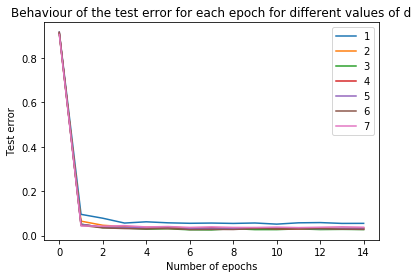

In [62]:
for d in range(7):
    plt.plot(a_t_e_ovo[d], label=format(d+1))
    plt.legend()
    
plt.title('Behaviour of the test error for each epoch for different values of d')
plt.xlabel('Number of epochs')
plt.ylabel('Test error')

In [72]:
### Main function to find the Training and Test Errors for d = (1,...,7)

def find_test_errors(data, number_of_runs):
    
    data_frame = {'Test error':[]
       }
    df = pd.DataFrame(data_frame)

    n, dim = data.shape
    split_size = int(0.8*n)
    
    for d in range(1, 8):
        test_errors = np.zeros(number_of_runs)
        #print('Training for Polynomial Degree: {}'.format(d))
        
        for r in range(number_of_runs):
            #print('------- Run {} -------'.format(r+1))
            np.random.shuffle(data)
            x_train = data[:split_size,1:dim]
            y_train = data[:split_size,0][:, np.newaxis]
            x_test = data[split_size:,1:dim]
            y_test = data[split_size:,0][:, np.newaxis]
            test_errors[r] = train_and_predict_all_classifiers_K_epochs(x_train, y_train, x_test, y_test, 3, d)
            
        str = '{0:.2f}% \u00B1 {1:.2f}%'.format(100*np.mean(test_errors), 100*np.sqrt(np.var(test_errors)))
        df = df.append({'Test error': str}, ignore_index=True)
          
    df.index = np.arange(1,len(df)+1)
    return df

In [64]:
df_ovo = find_test_errors(data, 20)

Training for Polynomial Degree: 1
------- Run 1 -------
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1...
Performing epoch 2...
Performing epoch 3...
Performing epoch 1..

In [65]:
df_ovo

,Test error
1,6.31% ± 0.65%
2,4.29% ± 0.51%
3,3.71% ± 0.43%
4,3.45% ± 0.46%
5,3.36% ± 0.41%
6,3.35% ± 0.43%
7,3.64% ± 0.44%


**Rpeat task 2:**

In [75]:
def find_training_test_errors_OVO_CV(data, number_of_runs):
    
    data_frame_1 = {'d*':[], 'test error':[],
       }
    df1 = pd.DataFrame(data_frame_1)
    
    data_frame_2 = {'Mean d* and std':[], 'Mean test error and std':[],}
    df2 = pd.DataFrame(data_frame_2)
    
    n, dim = data.shape
    split_size = int(0.8*n)
    
    best_d_array = np.zeros(shape=(number_of_runs,2))
    
    for r in tqdm(range(number_of_runs)):
        
        np.random.shuffle(data)
        x_train = data[:split_size,1:dim]
        y_train = data[:split_size,0][:, np.newaxis]
        x_test = data[split_size:,1:dim]
        y_test = data[split_size:,0][:, np.newaxis]
        
        #print('------- Run {} -------'.format(r+1)) 
        test_errors_for_each_d = np.zeros(7)
        
        kf = KFold(n_splits=5, random_state=None, shuffle=False)
    
        for train_index, test_index in kf.split(x_train):
            X_train, X_test = x_train[train_index], x_train[test_index]
            Y_train, Y_test = y_train[train_index], y_train[test_index]
        
            for d in range(1, 8):
                #print('Training for Polynomial Degree: {}'.format(d))
                test_errors = train_and_predict_all_classifiers_K_epochs(X_train, Y_train, X_test, Y_test, 3, d)
                test_errors_for_each_d[d-1] += test_errors
            
        best_d = np.argmin(test_errors_for_each_d)+1
        test_error_best_d = train_and_predict_all_classifiers_K_epochs(x_train, y_train, x_test, y_test, 3, best_d)
         
        best_d_array[r, 0], best_d_array[r, 1] = best_d, test_error_best_d
        
        str1 = '{0:.2f}%'.format(100*test_error_best_d)
        df1 = df1.append({'d*': best_d,'test error': str1}, ignore_index=True)  
         
    
    str2 = '{0:.2f} \u00B1 {1:.2f}'.format(np.mean(best_d_array[:,0]), np.sqrt(np.var(best_d_array[:,0])))
    str3 = '{0:.2f}% \u00B1 {1:.2f}%'.format(100*np.mean(best_d_array[:,1]), 100*np.sqrt(np.var(best_d_array[:,1])))
    df2 = df2.append({'Mean d* and std': str2, 'Mean test error and std': str3}, ignore_index=True)
    
    
    df1.index = np.arange(1,len(df1)+1)
    df2.index = np.arange(1,len(df2)+1)
    
    return df1, df2

In [76]:
df1_ovo, df2_ovo = find_training_test_errors_OVO_CV(data, 20)





  0%|          | 0/20 [00:00<?, ?it/s]



  5%|▌         | 1/20 [08:57<2:50:04, 537.10s/it]



 10%|█         | 2/20 [18:42<2:45:29, 551.62s/it]



 15%|█▌        | 3/20 [26:33<2:29:25, 527.37s/it]



 20%|██        | 4/20 [34:17<2:15:34, 508.43s/it]



 25%|██▌       | 5/20 [44:33<2:15:12, 540.80s/it]



 30%|███       | 6/20 [52:47<2:02:53, 526.67s/it]



 35%|███▌      | 7/20 [1:03:11<2:00:25, 555.82s/it]



 40%|████      | 8/20 [1:09:57<1:42:10, 510.84s/it]



 45%|████▌     | 9/20 [1:16:04<1:25:43, 467.61s/it]



 50%|█████     | 10/20 [3:48:49<8:32:50, 3077.02s/it]



 55%|█████▌    | 11/20 [3:55:29<5:41:03, 2273.70s/it]



 60%|██████    | 12/20 [4:04:40<3:54:16, 1757.04s/it]



 65%|██████▌   | 13/20 [4:15:59<2:47:15, 1433.68s/it]



 70%|███████   | 14/20 [4:26:30<1:59:17, 1192.89s/it]



 75%|███████▌  | 15/20 [4:39:06<1:28:29, 1061.83s/it]



 80%|████████  | 16/20 [4:52:06<1:05:09, 977.29s/it] 



 85%|████████▌ | 17/20 [5:03:49<44:44, 894.94s/it]  



 90%|█████████ |

In [77]:
display(df1_ovo, df2_ovo)

,d*,test error
1,6.0,3.87%
2,5.0,3.17%
3,4.0,3.06%
4,7.0,3.23%
5,5.0,3.12%
6,6.0,3.28%
7,5.0,3.76%
8,4.0,3.23%
9,4.0,3.87%
10,5.0,4.03%


,Mean d* and std,Mean test error and std
1,5.15 ± 0.79,3.35% ± 0.35%


In [78]:
display(df1_ovo.transpose())

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
d*,6,5,4,7,5,6,5,4,4,5,5,5,6,5,4,6,5,5,5,6
test error,3.87%,3.17%,3.06%,3.23%,3.12%,3.28%,3.76%,3.23%,3.87%,4.03%,3.49%,3.49%,2.85%,3.60%,3.06%,2.85%,2.90%,3.39%,3.60%,3.12%


### 7. SVM and Forgetron
Choose two more algorithms to compare to the kernel perceptron each of these algorithms will have
a parameter vector θ and you will need to determine a cross-validation set S_θ with this information
repeat 1 and 2 for your new algorithms.

### SVM: ###

**Repeat Task 1:**

In [69]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [115]:
def find_test_errors_SVM(data, number_of_runs, c):
    
    data_frame = {'Gamma value':[], 'Test error':[]
       }
    df = pd.DataFrame(data_frame)

    n, dim = data.shape
    split_size = int(0.8*n)

    for g in (np.linspace(0.0001,0.1,7)):
        test_errors = np.zeros(number_of_runs)
        print('Training for exponetial kernel with parameter: {}'.format(g))
        
        for r in range(number_of_runs):
            print('------- Run {} -------'.format(r+1))
            np.random.shuffle(data)
            x_train = data[:split_size,1:dim]
            y_train = np.ravel(data[:split_size,0][:, np.newaxis])
            x_test = data[split_size:,1:dim]
            y_test = np.ravel(data[split_size:,0][:, np.newaxis])
            
            clf = SVC(kernel='rbf', C=c, gamma=g)     # gamma is same as c in previous question
            clf.fit(x_train, y_train)
            test_errors[r] = 1-clf.score(x_test,y_test)   # score returns the mean accuracy on the given test data and labels
           
        str = '{0:.2f}% \u00B1 {1:.2f}%'.format(100*np.mean(test_errors), 100*np.sqrt(np.var(test_errors)))
        df = df.append({'Gamma value': g, 'Test error': str}, ignore_index=True)
          
    df.index = np.arange(1,len(df)+1)
    return df

In [123]:
def find_test_errors_SVM_C(data, number_of_runs):
    
    data_frame = {'C':[], 'Test error':[]
       }
    df = pd.DataFrame(data_frame)

    n, dim = data.shape
    split_size = int(0.8*n)

    for c in ([1,10,100,1000,10000]):
        test_errors = np.zeros(number_of_runs)
        print('Training for parameter C equal to: {}'.format(c))
        
        for r in range(number_of_runs):
            print('------- Run {} -------'.format(r+1))
            np.random.shuffle(data)
            x_train = data[:split_size,1:dim]
            y_train = np.ravel(data[:split_size,0][:, np.newaxis])
            x_test = data[split_size:,1:dim]
            y_test = np.ravel(data[split_size:,0][:, np.newaxis])
            
            clf = SVC(kernel='rbf', C=c, gamma=0.0117)     # gamma is same as c in previous question
            clf.fit(x_train, y_train)
            test_errors[r] = 1-clf.score(x_test,y_test)   # score returns the mean accuracy on the given test data and labels
           
        str = '{0:.2f}% \u00B1 {1:.2f}%'.format(100*np.mean(test_errors), 100*np.sqrt(np.var(test_errors)))
        df = df.append({'C': c, 'Test error': str}, ignore_index=True)
          
    df.index = np.arange(1,len(df)+1)
    return df

In [124]:
df_svm = find_test_errors_SVM_C(data,20)

Training for parameter C equal to: 1
------- Run 1 -------
------- Run 2 -------
------- Run 3 -------
------- Run 4 -------
------- Run 5 -------
------- Run 6 -------
------- Run 7 -------
------- Run 8 -------
------- Run 9 -------
------- Run 10 -------
------- Run 11 -------
------- Run 12 -------
------- Run 13 -------
------- Run 14 -------
------- Run 15 -------
------- Run 16 -------
------- Run 17 -------
------- Run 18 -------
------- Run 19 -------
------- Run 20 -------
Training for parameter C equal to: 10
------- Run 1 -------
------- Run 2 -------
------- Run 3 -------
------- Run 4 -------
------- Run 5 -------
------- Run 6 -------
------- Run 7 -------
------- Run 8 -------
------- Run 9 -------
------- Run 10 -------
------- Run 11 -------
------- Run 12 -------
------- Run 13 -------
------- Run 14 -------
------- Run 15 -------
------- Run 16 -------
------- Run 17 -------
------- Run 18 -------
------- Run 19 -------
------- Run 20 -------
Training for parameter 

In [125]:
display(df_svm)

,C,Test error
1,1.0,2.45% ± 0.43%
2,10.0,2.20% ± 0.30%
3,100.0,2.21% ± 0.37%
4,1000.0,2.07% ± 0.23%
5,10000.0,2.17% ± 0.28%


In [ ]:
def find_test_errors_SVM_poly(data, number_of_runs, c):
    
    data_frame = {'d':[], 'Test error':[]
       }
    df = pd.DataFrame(data_frame)

    n, dim = data.shape
    split_size = int(0.8*n)

    for d in range(1, 8):
        test_errors = np.zeros(number_of_runs)
        print('Training for polynomial kernel of degree: {}'.format(d))
        
        for r in range(number_of_runs):
            print('------- Run {} -------'.format(r+1))
            np.random.shuffle(data)
            x_train = data[:split_size,1:dim]
            y_train = np.ravel(data[:split_size,0][:, np.newaxis])
            x_test = data[split_size:,1:dim]
            y_test = np.ravel(data[split_size:,0][:, np.newaxis])
            
            clf = SVC(kernel='poly', C=c, degree=d)     # gamma is same as c in previous question
            clf.fit(x_train, y_train)
            test_errors[r] = 1-clf.score(x_test,y_test)   # score returns the mean accuracy on the given test data and labels
            
        str = '{0:.2f}% \u00B1 {1:.2f}%'.format(100*np.mean(test_errors), 100*np.sqrt(np.var(test_errors)))
        df = df.append({'d': d, 'Test error': str}, ignore_index=True)
          
    df.index = np.arange(1,len(df)+1)
    return df

In [ ]:
df_svm_poly = find_test_errors_SVM_poly(data,20,100)

In [ ]:
display(df_svm_poly)

**Repeat Task 2:**

In [91]:
def find_test_errors_SVM_CV(data, number_of_runs):
    
    data_frame_1 = {'gamma*':[], 'test error':[],
       }
    df1 = pd.DataFrame(data_frame_1)
    
    data_frame_2 = {'Mean gamma* and std':[], 'Mean test error and std':[],}
    df2 = pd.DataFrame(data_frame_2)
    
    n, dim = data.shape
    split_size = int(0.8*n)
    
    best_g_array = np.zeros(shape=(number_of_runs,2))
    
    for r in range(number_of_runs):
        
        np.random.shuffle(data)
        x_train = data[:split_size,1:dim]
        y_train = np.ravel(data[:split_size,0][:, np.newaxis])
        x_test = data[split_size:,1:dim]
        y_test = np.ravel(data[split_size:,0][:, np.newaxis])
        
        print('------- Run {} -------'.format(r+1)) 
        error_for_each_g = np.zeros(7)
        
        kf = KFold(n_splits=5, random_state=None, shuffle=False)
    
        for train_index, test_index in kf.split(x_train):
            X_train, X_test = x_train[train_index], x_train[test_index]
            Y_train, Y_test = y_train[train_index], y_train[test_index]
            
            count = 0 
            for g in (np.linspace(0.01,0.02,7)):
                print('Training for exponetial kernel with parameter: {}'.format(g))
                clf = SVC(kernel='rbf', C=c, gamma=g)   
                clf.fit(X_train, Y_train)
                accuracy = clf.score(X_test, Y_test)
                error_for_each_g[count] += 1-accuracy 
                count += 1
            
        best_count = np.argmin(error_for_each_g)
        best_g = np.linspace(0.01,0.02,7)[best_count]
        clf = SVC(kernel='rbf', C=c, gamma=best_g)   
        clf.fit(x_train, y_train)
        error_best_g = 1-clf.score(x_test, y_test) 
         
        best_g_array[r, 0], best_g_array[r, 1] = best_g, error_best_g
        
        str1 = '{0:.4f}%'.format(100*error_best_g)
        df1 = df1.append({'gamma*': best_g,'test error': str1}, ignore_index=True)  
         
    
    str2 = '{0:.2f} \u00B1 {1:.2f}'.format(np.mean(best_g_array[:,0]), np.sqrt(np.var(best_g_array[:,0])))
    str3 = '{0:.2f}% \u00B1 {1:.2f}%'.format(100*np.mean(best_g_array[:,1]), 100*np.sqrt(np.var(best_g_array[:,1])))
    df2 = df2.append({'Mean gamma* and std': str2, 'Mean test error and std': str3}, ignore_index=True)
    
    
    df1.index = np.arange(1,len(df1)+1)
    df2.index = np.arange(1,len(df2)+1)
    
    return df1, df2

In [139]:
def find_test_errors_SVM_CV_C(data, number_of_runs):
    
    data_frame_1 = {'C*':[], 'test error':[],
       }
    df1 = pd.DataFrame(data_frame_1)
    
    data_frame_2 = {'Mean C* and std':[], 'Mean test error and std':[],}
    df2 = pd.DataFrame(data_frame_2)
    
    n, dim = data.shape
    split_size = int(0.8*n)
    
    best_C_array = np.zeros(shape=(number_of_runs,2))
    
    for r in range(number_of_runs):
        
        np.random.shuffle(data)
        x_train = data[:split_size,1:dim]
        y_train = np.ravel(data[:split_size,0][:, np.newaxis])
        x_test = data[split_size:,1:dim]
        y_test = np.ravel(data[split_size:,0][:, np.newaxis])
        
        print('------- Run {} -------'.format(r+1)) 
        error_for_each_C = np.zeros(5)
        
        kf = KFold(n_splits=5, random_state=None, shuffle=False)
    
        for train_index, test_index in kf.split(x_train):
            X_train, X_test = x_train[train_index], x_train[test_index]
            Y_train, Y_test = y_train[train_index], y_train[test_index]
            
            count = 0 
            for c in ([1,10,100,1000,10000]):
                print('Training for parameter C equal to: {}'.format(c))
                clf = SVC(kernel='rbf', C=c, gamma=0.0117)   
                clf.fit(X_train, Y_train)
                accuracy = clf.score(X_test, Y_test)
                error_for_each_C[count] += 1-accuracy 
                count += 1
            
        best_count = np.argmin(error_for_each_C)
        best_C = [1,10,100,1000,10000][best_count]
        clf = SVC(kernel='rbf', C=best_C, gamma=0.0117)   
        clf.fit(x_train, y_train)
        error_best_C = 1-clf.score(x_test, y_test) 
         
        best_C_array[r, 0], best_C_array[r, 1] = best_C, error_best_C
        
        str1 = '{0:.2f}%'.format(100*error_best_C)
        df1 = df1.append({'C*': best_C,'test error': str1}, ignore_index=True)  
         
    
    str2 = '{0:.2f} \u00B1 {1:.2f}'.format(np.mean(best_C_array[:,0]), np.sqrt(np.var(best_C_array[:,0])))
    str3 = '{0:.2f}% \u00B1 {1:.2f}%'.format(100*np.mean(best_C_array[:,1]), 100*np.sqrt(np.var(best_C_array[:,1])))
    df2 = df2.append({'Mean C* and std': str2, 'Mean test error and std': str3}, ignore_index=True)
    
    
    df1.index = np.arange(1,len(df1)+1)
    df2.index = np.arange(1,len(df2)+1)
    
    return df1, df2

In [140]:
df1_svm, df2_svm = find_test_errors_SVM_CV_C(data, 20)

------- Run 1 -------
Training for parameter C equal to: 1
Training for parameter C equal to: 10
Training for parameter C equal to: 100
Training for parameter C equal to: 1000
Training for parameter C equal to: 10000
Training for parameter C equal to: 1
Training for parameter C equal to: 10
Training for parameter C equal to: 100
Training for parameter C equal to: 1000
Training for parameter C equal to: 10000
Training for parameter C equal to: 1
Training for parameter C equal to: 10
Training for parameter C equal to: 100
Training for parameter C equal to: 1000
Training for parameter C equal to: 10000
Training for parameter C equal to: 1
Training for parameter C equal to: 10
Training for parameter C equal to: 100
Training for parameter C equal to: 1000
Training for parameter C equal to: 10000
Training for parameter C equal to: 1
Training for parameter C equal to: 10
Training for parameter C equal to: 100
Training for parameter C equal to: 1000
Training for parameter C equal to: 10000
---

In [141]:
display(df1_svm, df2_svm)

,C*,test error
1,10.0,2.31%
2,10.0,1.94%
3,10.0,2.15%
4,10.0,2.58%
5,10.0,2.42%
6,10.0,1.99%
7,10.0,2.10%
8,10.0,2.42%
9,10.0,2.10%
10,10.0,2.15%


,Mean C* and std,Mean test error and std
1,10.00 ± 0.00,2.15% ± 0.30%


In [142]:
display(df1_svm.transpose())

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
C*,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
test error,2.31%,1.94%,2.15%,2.58%,2.42%,1.99%,2.10%,2.42%,2.10%,2.15%,2.63%,2.58%,1.67%,2.15%,1.56%,2.10%,2.10%,2.04%,1.61%,2.37%


##### Produce a classification report (may be useful for our report)

In [46]:
n, dim = data.shape
split_size = int(0.8*n)

np.random.shuffle(data)
x_train = data[:split_size,1:dim]
y_train = np.ravel(data[:split_size,0][:, np.newaxis])
x_test = data[split_size:,1:dim]
y_test = np.ravel(data[split_size:,0][:, np.newaxis])

clf = SVC(kernel='rbf', C=1.0, gamma=0.016)   
clf.fit(x_train, y_train)
#accuracies[r] = clf.score(x_test,y_test)

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99       320
        1.0       0.99      0.98      0.99       242
        2.0       0.94      0.98      0.96       168
        3.0       0.98      0.96      0.97       154
        4.0       0.98      0.95      0.97       176
        5.0       0.94      0.98      0.96       142
        6.0       0.98      0.98      0.98       170
        7.0       1.00      0.99      0.99       158
        8.0       0.99      0.97      0.98       145
        9.0       0.99      0.98      0.98       185

avg / total       0.98      0.98      0.98      1860

